# What Is Machine Learning?

Machine learning is often categorized as a subfield of artificial intelligence, but I find that categorization can often be misleading at first brush. The study of machine learning certainly arose from research in this context, but in the data science application of machine learning methods, it's more helpful to think of machine learning as a means of building models of data

Fundamentally, machine learning involves building mathematical models to help understand data. "Learning" enters the fray when we give these models tunable parameters that can be adapted to observed data; in this way the program can be considered to be "learning" from the data.

## Categories of Machine Learning

Machine learning can be categorized into two main types: *supervised learning* and *unsupervised learning*.

***Supervised learning*** involves somehow modeling the relationship between measured features of data and some label associated with the data; once this model is determined, it can be used to apply labels to new, unknown data. This is further subdivided into classification tasks and regression tasks: in classification, the labels are discrete categories, while in regression, the labels are continuous quantities. We will see examples of both types of supervised learning in the following section.

***Unsupervised learning*** involves modeling the features of a dataset without reference to any label, and is often described as "letting the dataset speak for itself." These models include tasks such as clustering and dimensionality reduction. Clustering algorithms identify distinct groups of data, while dimensionality reduction algorithms search for more succinct representations of the data. We will see examples of both types of unsupervised learning in the following section.

In addition, there are so-called ***semi-supervised*** learning methods, which falls somewhere between supervised learning and unsupervised learning. Semi-supervised learning methods are often useful when only incomplete labels are available.

## Qualitative Examples of Machine Learning Applications

In [5]:
# common plot formatting for below
def format_plot(ax, title):
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.set_xlabel('feature 1', color='gray')
    ax.set_ylabel('feature 2', color='gray')
    ax.set_title(title, color='gray')

### Classification: Predicting discrete labels

In [8]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import os
if not os.path.exists('figures'):
    os.makedirs('figures')
    
# create 50 separable points
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

# fit the support vector classifier model
clf = SVC(kernel='linear')
clf.fit(X, y)

# create some new points to predict
X2, _ = make_blobs(n_samples=80, centers=2,
                   random_state=0, cluster_std=0.80)
X2 = X2[50:]

# predict the labels
y2 = clf.predict(X2)

#### Classification example 1 

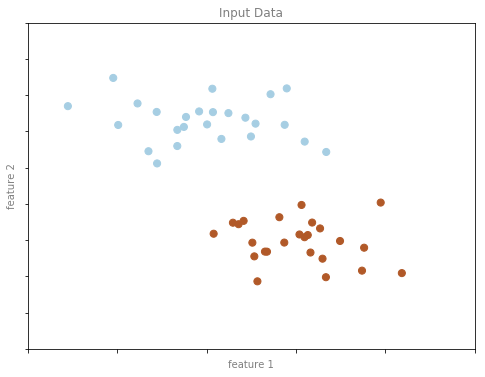

In [9]:
# plot the data
fig, ax = plt.subplots(figsize=(8, 6))
point_style = dict(cmap='Paired', s=50)
ax.scatter(X[:, 0], X[:, 1], c=y, **point_style)

# format plot
format_plot(ax, 'Input Data')
ax.axis([-1, 4, -2, 7])

fig.savefig('figures/05.01-classification-1.png')

We have one of two class labels for each point, here represented by the colors of the points. From these features and labels, we would like to create a model that will let us decide whether a new point should be labeled "blue" or "red."

There are a number of possible models for such a classification task, but here we will use an extremely simple one. We will make the assumption that the two groups can be separated by drawing a straight line through the plane between them, such that points on each side of the line fall in the same group.

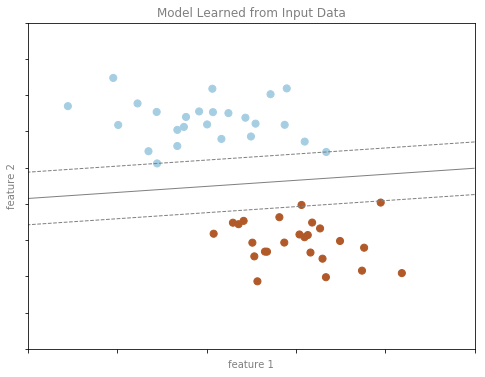

In [10]:
# Get contours describing the model
xx = np.linspace(-1, 4, 10)
yy = np.linspace(-2, 7, 10)
xy1, xy2 = np.meshgrid(xx, yy)
Z = np.array([clf.decision_function([t])
              for t in zip(xy1.flat, xy2.flat)]).reshape(xy1.shape)

# plot points and model
fig, ax = plt.subplots(figsize=(8, 6))
line_style = dict(levels = [-1.0, 0.0, 1.0],
                  linestyles = ['dashed', 'solid', 'dashed'],
                  colors = 'gray', linewidths=1)
ax.scatter(X[:, 0], X[:, 1], c=y, **point_style)
ax.contour(xy1, xy2, Z, **line_style)

# format plot
format_plot(ax, 'Model Learned from Input Data')
ax.axis([-1, 4, -2, 7])

fig.savefig('figures/05.01-classification-2.png')

Now that this model has been trained, it can be generalized to new, unlabeled data. In other words, we can take a new set of data, draw this model line through it, and assign labels to the new points based on this model. 

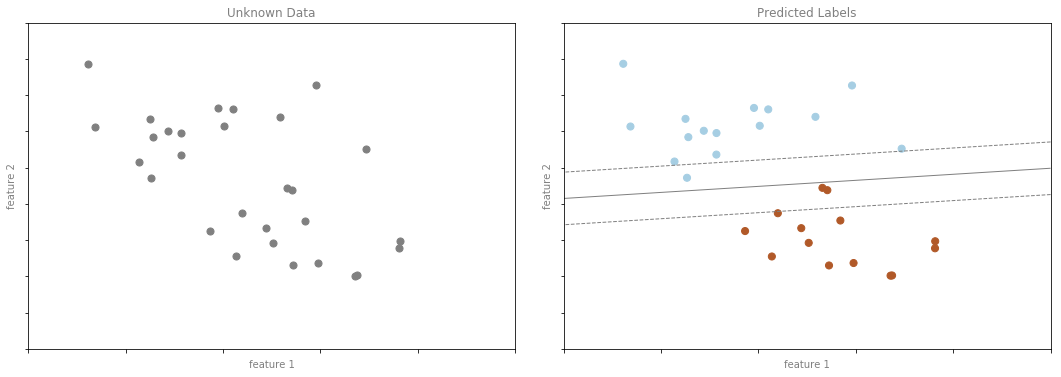

In [11]:
# plot the results
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax[0].scatter(X2[:, 0], X2[:, 1], c='gray', **point_style)
ax[0].axis([-1, 4, -2, 7])

ax[1].scatter(X2[:, 0], X2[:, 1], c=y2, **point_style)
ax[1].contour(xy1, xy2, Z, **line_style)
ax[1].axis([-1, 4, -2, 7])

format_plot(ax[0], 'Unknown Data')
format_plot(ax[1], 'Predicted Labels')

fig.savefig('figures/05.01-classification-3.png')

This is the basic idea of a classification task in machine learning, where "classification" indicates that the data has discrete class labels. A benefit of the machine learning approach, however, is that it can generalize to much larger datasets in many more dimensions.

Some important classification algorithms that we will discuss in more detail are Gaussian naive Bayes (see In Depth: Naive Bayes Classification), support vector machines (see In-Depth: Support Vector Machines), and random forest classification (see In-Depth: Decision Trees and Random Forests).

### Regression: Predicting continuous labels

In [14]:
from sklearn.linear_model import LinearRegression

# Create some data for the regression
rng = np.random.RandomState(1)

X = rng.randn(200, 2)
y = np.dot(X, [-2, 1]) + 0.1 * rng.randn(X.shape[0])

# fit the regression model
model = LinearRegression()
model.fit(X, y)

# create some new points to predict
X2 = rng.randn(100, 2)

# predict the labels
y2 = model.predict(X2)

We will next look at a simple regression task in which the labels are continuous quantities.

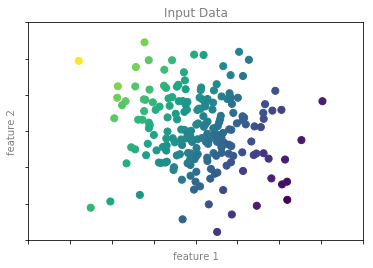

In [15]:
# plot data points
fig, ax = plt.subplots()
points = ax.scatter(X[:, 0], X[:, 1], c=y, s=50,
                    cmap='viridis')

# format plot
format_plot(ax, 'Input Data')
ax.axis([-4, 4, -3, 3])

fig.savefig('figures/05.01-regression-1.png')

There are a number of possible regression models we might use for this type of data, but here we will use a simple linear regression to predict the points. This simple linear regression model assumes that if we treat the label as a third spatial dimension, we can fit a plane to the data

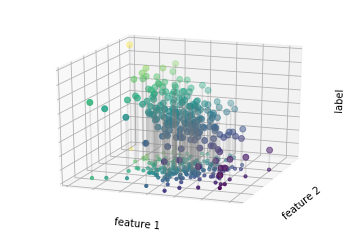

In [16]:
from mpl_toolkits.mplot3d.art3d import Line3DCollection

points = np.hstack([X, y[:, None]]).reshape(-1, 1, 3)
segments = np.hstack([points, points])
segments[:, 0, 2] = -8

# plot points in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c=y, s=35,
           cmap='viridis')
ax.add_collection3d(Line3DCollection(segments, colors='gray', alpha=0.2))
ax.scatter(X[:, 0], X[:, 1], -8 + np.zeros(X.shape[0]), c=y, s=10,
           cmap='viridis')

# format plot
ax.patch.set_facecolor('white')
ax.view_init(elev=20, azim=-70)
ax.set_zlim3d(-8, 8)
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.zaxis.set_major_formatter(plt.NullFormatter())
ax.set(xlabel='feature 1', ylabel='feature 2', zlabel='label')

# Hide axes (is there a better way?)
ax.w_xaxis.line.set_visible(False)
ax.w_yaxis.line.set_visible(False)
ax.w_zaxis.line.set_visible(False)
for tick in ax.w_xaxis.get_ticklines():
    tick.set_visible(False)
for tick in ax.w_yaxis.get_ticklines():
    tick.set_visible(False)
for tick in ax.w_zaxis.get_ticklines():
    tick.set_visible(False)

fig.savefig('figures/05.01-regression-2.png')

From this view, it seems reasonable that fitting a plane through this three-dimensional data would allow us to predict the expected label for any set of input parameters. Returning to the two-dimensional projection, when we fit such a plane we get the result shown in the following figure:

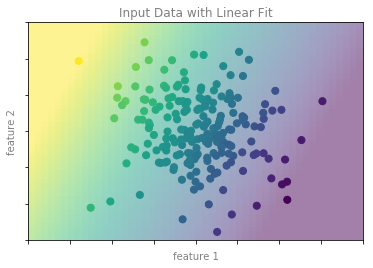

In [17]:
from matplotlib.collections import LineCollection

# plot data points
fig, ax = plt.subplots()
pts = ax.scatter(X[:, 0], X[:, 1], c=y, s=50,
                 cmap='viridis', zorder=2)

# compute and plot model color mesh
xx, yy = np.meshgrid(np.linspace(-4, 4),
                     np.linspace(-3, 3))
Xfit = np.vstack([xx.ravel(), yy.ravel()]).T
yfit = model.predict(Xfit)
zz = yfit.reshape(xx.shape)
ax.pcolorfast([-4, 4], [-3, 3], zz, alpha=0.5,
              cmap='viridis', norm=pts.norm, zorder=1)

# format plot
format_plot(ax, 'Input Data with Linear Fit')
ax.axis([-4, 4, -3, 3])

fig.savefig('figures/05.01-regression-3.png')

This plane of fit gives us what we need to predict labels for new points. Visually, we find the results shown in the following figure

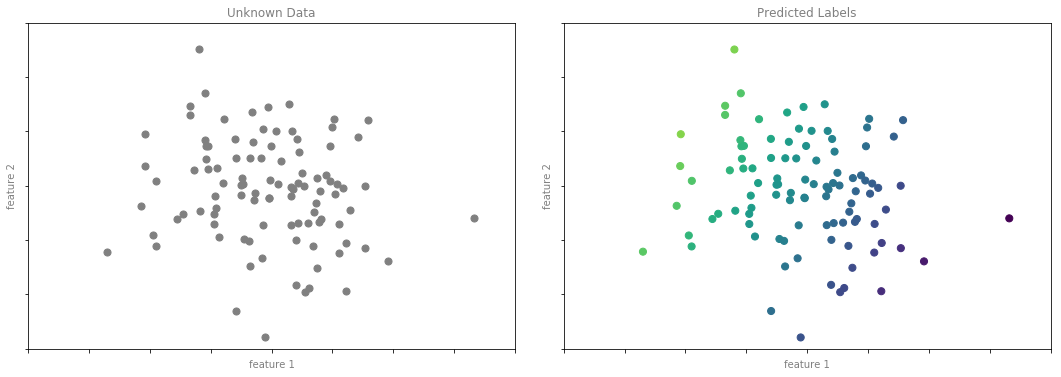

In [18]:
# plot the model fit
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax[0].scatter(X2[:, 0], X2[:, 1], c='gray', s=50)
ax[0].axis([-4, 4, -3, 3])

ax[1].scatter(X2[:, 0], X2[:, 1], c=y2, s=50,
              cmap='viridis', norm=pts.norm)
ax[1].axis([-4, 4, -3, 3])

# format plots
format_plot(ax[0], 'Unknown Data')
format_plot(ax[1], 'Predicted Labels')

fig.savefig('figures/05.01-regression-4.png')

As with the classification example, this may seem rather trivial in a low number of dimensions. But the power of these methods is that they can be straightforwardly applied and evaluated in the case of data with many, many features.

Some important regression algorithms that we will discuss are linear regression (see In Depth: Linear Regression), support vector machines (see In-Depth: Support Vector Machines), and random forest regression (see In-Depth: Decision Trees and Random Forests).

### Clustering: Inferring labels on unlabeled data

The classification and regression illustrations we just looked at are examples of supervised learning algorithms, in which we are trying to build a model that will predict labels for new data. Unsupervised learning involves models that describe data without reference to any known labels.

In [20]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

# create 50 separable points
X, y = make_blobs(n_samples=100, centers=4,
                  random_state=42, cluster_std=1.5)

# Fit the K Means model
model = KMeans(4, random_state=0)
y = model.fit_predict(X)


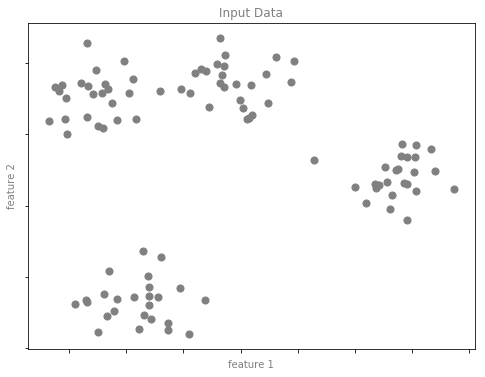

In [21]:
# plot the input data
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], s=50, color='gray')

# format the plot
format_plot(ax, 'Input Data')

fig.savefig('figures/05.01-clustering-1.png')

By eye, it is clear that each of these points is part of a distinct group. Given this input, a clustering model will use the intrinsic structure of the data to determine which points are related. Using the very fast and intuitive k-means algorithm (see In Depth: K-Means Clustering), we find the clusters shown in the following figure

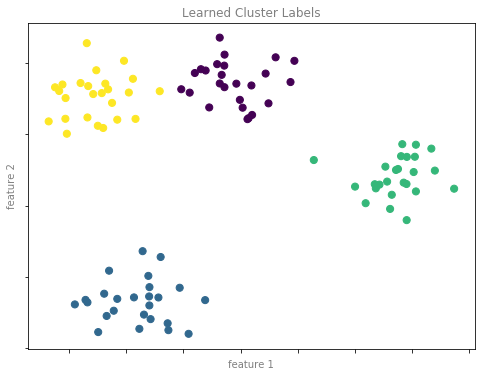

In [22]:
# plot the data with cluster labels
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap='viridis')

# format the plot
format_plot(ax, 'Learned Cluster Labels')

fig.savefig('figures/05.01-clustering-2.png')

k-means fits a model consisting of k cluster centers; the optimal centers are assumed to be those that minimize the distance of each point from its assigned center.

We will discuss the k-means algorithm in more depth in In Depth: K-Means Clustering. Other important clustering algorithms include Gaussian mixture models (See In Depth: Gaussian Mixture Models) and spectral clustering (See Scikit-Learn's clustering documentation).

### Dimensionality reduction: Inferring structure of unlabeled data

Dimensionality reduction is another example of an unsupervised algorithm, in which labels or other information are inferred from the structure of the dataset itself.

Different dimensionality reduction routines measure these relevant qualities in different ways, as we will see in In-Depth: Manifold Learning.

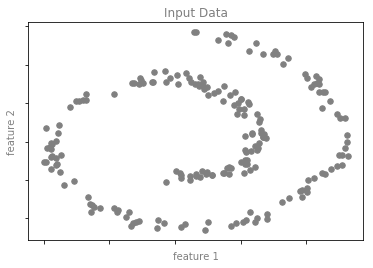

In [23]:
from sklearn.datasets import make_swiss_roll

# make data
X, y = make_swiss_roll(200, noise=0.5, random_state=42)
X = X[:, [0, 2]]

# visualize data
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], color='gray', s=30)

# format the plot
format_plot(ax, 'Input Data')

fig.savefig('figures/05.01-dimesionality-1.png')

A suitable dimensionality reduction model in this case would be sensitive to this nonlinear embedded structure, and be able to pull out this lower-dimensionality representation.

The following figure shows a visualization of the results of the Isomap algorithm, a manifold learning algorithm that does exactly this

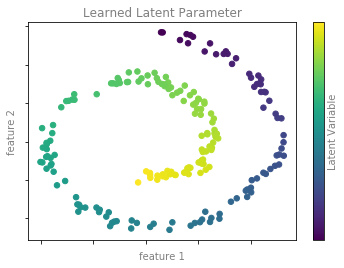

In [24]:
from sklearn.manifold import Isomap

model = Isomap(n_neighbors=8, n_components=1)
y_fit = model.fit_transform(X).ravel()

# visualize data
fig, ax = plt.subplots()
pts = ax.scatter(X[:, 0], X[:, 1], c=y_fit, cmap='viridis', s=30)
cb = fig.colorbar(pts, ax=ax)

# format the plot
format_plot(ax, 'Learned Latent Parameter')
cb.set_ticks([])
cb.set_label('Latent Variable', color='gray')

fig.savefig('figures/05.01-dimesionality-2.png')

Notice that the colors (which represent the extracted one-dimensional latent variable) change uniformly along the spiral, which indicates that the algorithm did in fact detect the structure we saw by eye

Some important dimensionality reduction algorithms that we will discuss are principal component analysis (see In Depth: Principal Component Analysis) and various manifold learning algorithms, including Isomap and locally linear embedding (See In-Depth: Manifold Learning).

## Summary

In short, we saw the following:

* *Supervised learning*: Models that can predict labels based on labeled training data
     - *Classification*: Models that predict labels as two or more discrete categories
     - *Regression*: Models that predict continuous labels

* *Unsupervised learning*: Models that identify structure in unlabeled data
     - *Clustering*: Models that detect and identify distinct groups in the data
     - *Dimensionality reduction*: Models that detect and identify lower-dimensional structure in higher-dimensional data

